In [470]:
import numpy as np
import matplotlib.pyplot as plt
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

In [536]:
N = 100+2 # no. of FV cells
x = np.linspace(0.0, 1.0, N)
u0 = np.sin(x * 2 * np.pi) # continuous sinusoidal initial condition

#u0 = np.ones(N) 
#u0[0:5] = 2.0 # Hat i.c.
#u0[5:] = 1.
u0[0] = 0. # b.c. on left ghost cells
u0[-1] = 0. # b.c. on right ghost cells

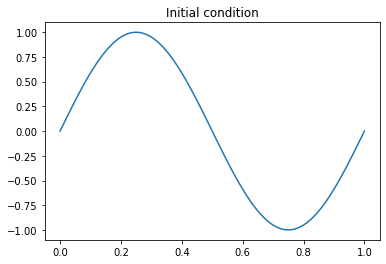

In [537]:
plt.plot(x, u0)
plt.title('Initial condition')
plt.show()

In [538]:
xx = [np.linspace(x[i], x[i+1], 3) for i in np.arange(0, len(x) - 1)]
uu = [np.linspace(u0[i], u0[i], 3) for i in np.arange(0, len(u0))]

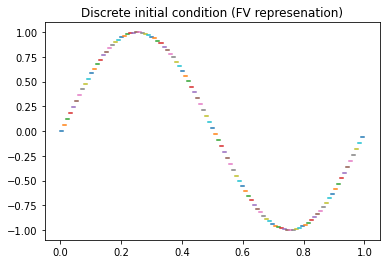

In [539]:
for i in np.arange(0, len(xx)):
    plt.plot(xx[i], uu[i])
plt.title('Discrete initial condition (FV represenation)')
plt.show()

In [540]:
dx = 1.0 / N
aP = np.ones(N-2)
# B.C.
u0[0] = 0.
u0[-1] = 0. # u(0, t) = u(l, t) = 0

In [541]:
u1 = u0.copy()
time = 0.01
dt = 0.01
for t in np.arange(0, time, dt):
    # interface fluxes for interior FV cells (Central Flux Scheme)
    Fw = np.square((u1[:-2] + u1[1:-1]) / 2.0) / 2.0
    Fe = np.square((u1[1:-1] + u1[2:]) / 2.0) / 2.0
    u_tdma = np.diag(aP, k=0)
    # source for interior FV cells
    S = u1[1:-1] + (Fw - Fe) * (dt/dx)
    # solve
    u_solution = np.linalg.solve(u_tdma, S)
    # update
    u1[1:-1] = u_solution

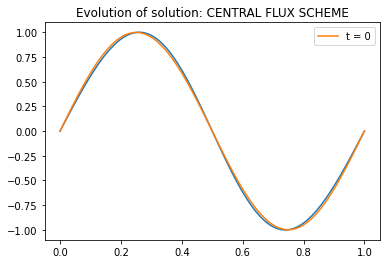

In [542]:
plt.plot(x, u1)
plt.plot(x, u0, label = 't = 0')
plt.title('Evolution of solution: CENTRAL FLUX SCHEME')
plt.legend()
plt.show()

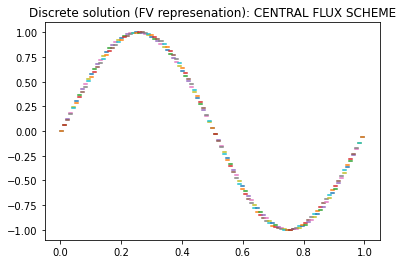

In [543]:
xx = [np.linspace(x[i], x[i+1], 3) for i in np.arange(0, len(x) - 1)]
uu0 = [np.linspace(u0[i], u0[i], 3) for i in np.arange(0, len(u0))]
uu1 = [np.linspace(u1[i], u1[i], 3) for i in np.arange(0, len(u1))]
for i in np.arange(0, len(xx)):
    plt.plot(xx[i], uu0[i])
    plt.plot(xx[i], uu1[i])
plt.title('Discrete solution (FV represenation): CENTRAL FLUX SCHEME')
plt.show()

In [544]:
uP = u0.copy()
dx = l/(N-2)
time = 0.3
dt = 0.2*dx
F = np.zeros(N-1) # Flux vector for interior FV cell faces
for t in np.arange(0, time, dt):
    # Fluxes at each FV cell centers
    FP = np.square(uP) / 2.0
    # shock/wave speed
    #u_wave = np.zeros(N-1)
    u_wave = (FP[1:] - FP[:-1]) / (uP[1:] - uP[:-1])
    #u_wave[-1] = (FP[-1]) / (uP[-1])
    # interface fluxes for interior FV cells (Upwind Scheme)
    for i in range(0, N-1):
        if u_wave[i] > 0.:
            F[i] = FP[i]
        elif u_wave[i] < 0.:
            F[i] = FP[i+1]
    
    u_tdma = np.diag(aP, k=0)
    # source for interior FV cells
    S = uP[1:-1] + (F[:-1] - F[1:]) * (dt/dx)
    # solve
    u_solution = np.linalg.solve(u_tdma, S)
    # update
    uP[1:-1] = u_solution

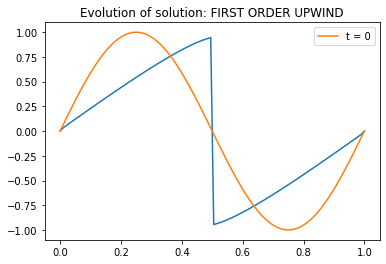

In [545]:
plt.plot(x, uP)
plt.plot(x, u0, label = 't = 0')
plt.title('Evolution of solution: FIRST ORDER UPWIND')
plt.legend()
plt.show()

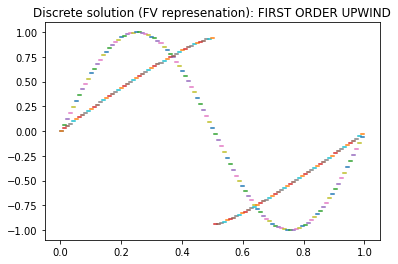

In [546]:
xx = [np.linspace(x[i], x[i+1], 3) for i in np.arange(0, len(x) - 1)]
uu0 = [np.linspace(u0[i], u0[i], 3) for i in np.arange(0, len(u0))]
uu1 = [np.linspace(uP[i], uP[i], 3) for i in np.arange(0, len(uP))]
for i in np.arange(0, len(xx)):
    plt.plot(xx[i], uu0[i])
    plt.plot(xx[i], uu1[i])
plt.title('Discrete solution (FV represenation): FIRST ORDER UPWIND')
plt.show()

In [641]:
N = 1000+2 # no. of FV cells + ghost cells
l = 10.
dx = l/(N-2)
x = np.linspace(0., l, N-2)

u = np.ones(N)
u[0:int(1./dx)] = 1.0 # Hat i.c.
u[int(1./dx):int(3./dx)] = 2.
u[0] = 1. # b.c. on left ghost cells
u[-1] = 1. # b.c. on right ghost cells

#u = np.sin(np.linspace(0., l, N) * 2 * np.pi) # continuous sinusoidal initial condition
#u[0] = 0. # b.c. on left ghost cells
#u[-1] = 0. # b.c. on right ghost cells

t = 4.
sigma = 0.2
dt = sigma*dx
nt = int(t/dt)

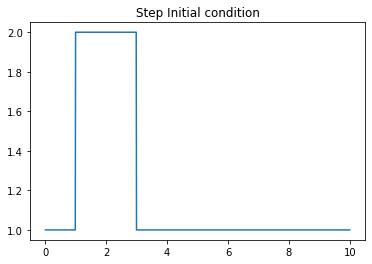

In [642]:
u0 = u.copy()
plt.plot(x, u[1:-1])
plt.title('Step Initial condition')
plt.show()

In [643]:
# Gudonov flux:

def Gudonov_flux(uL, uR):
    uI = 0.
    if uL > 0. and uR > 0.:
        uI = uL
    elif uL < 0. and uR < 0.:
        uI = uR
    elif uL < 0. and uR > 0.:
        uI = 0.
    elif uL > 0. and uR < 0.:
        c_shock = (uL+uR)/2.
        if c_shock > 0.:
            uI = uL
        elif c_shock < 0.:
            uI = uR
    elif uL == 0. and uR > 0.:
        uI = 0.
    elif uL > 0. and uR == 0.:
        uI = uL
    
    #f = np.square(uI)/2.
    f = uI
    
    return f

def signMax(a,b):
    if a < 0. and b > 0.:
        maxnum = max(abs(a),b)
        maxnum = -maxnum
    elif a == 0. and b > 0.:
        maxnum = b
    else:
        maxnum = max(a,b)
    
    return maxnum

def limiter(r):
    return np.amax([0, min(2*r,1), min(r,2)])

for n in range(0,nt):
    
    o = 0
    
    u_old = u.copy()
    
    for i in range(1,N-1):
        
        if i == 1:
            
            rL = (u[i]-u[i-1])/signMax((u[i+1]-u[i]),1.0e-6)
            uL = u[i] + o*(0.5*(u[i+1]-u[i])*limiter(rL))
            
            rR = (u[i+1]-u[i])/signMax((u[i+2]-u[i+1]),1.0e-6)
            uR = u[i+1] - o*(0.5*(u[i+2]-u[i+1])*limiter(rR))
            
            rLL = (u[i]-u[i-1])/signMax((u[i]-u[i-1]),1.0e-6)
            uLL = u[i-1] + o*(0.5*(u[i]-u[i-1])*limiter(rLL))
            
            rRR = (u[i]-u[i-1])/signMax((u[i+1]-u[i]),1.0e-6)
            uRR = u[i] - o*(0.5*(u[i+1]-u[i])*limiter(rRR))
            
        elif i == N-2:
            
            rL = (u[i]-u[i-1])/signMax((u[i+1]-u[i]),1.0e-6)
            uL = u[i] + o*(0.5*(u[i+1]-u[i])*limiter(rL))
            
            rR = (u[i+1]-u[i])/signMax((u[i+1]-u[i]),1.0e-6)
            uR = u[i+1] - o*(0.5*(u[i+1]-u[i])*limiter(rR))
            
            rLL = (u[i-1]-u[i-2])/signMax((u[i]-u[i-1]),1.0e-6)
            uLL = u[i-1] + o*(0.5*(u[i]-u[i-1])*limiter(rLL))
            
            rRR = (u[i]-u[i-1])/signMax((u[i+1]-u[i]),1.0e-6)
            uRR = u[i] - o*(0.5*(u[i+1]-u[i])*limiter(rRR))
            
        else:
            
            rL = (u[i]-u[i-1])/signMax((u[i+1]-u[i]),1.0e-6)
            uL = u[i] + o*(0.5*(u[i+1]-u[i])*limiter(rL))
            
            rR = (u[i+1]-u[i])/signMax((u[i+2]-u[i+1]),1.0e-6)
            uR = u[i+1] - o*(0.5*(u[i+2]-u[i+1])*limiter(rR))
            
            rLL = (u[i-1]-u[i-2])/signMax((u[i]-u[i-1]),1.0e-6)
            uLL = u[i-1] + o*(0.5*(u[i]-u[i-1])*limiter(rLL))
            
            rRR = (u[i]-u[i-1])/signMax((u[i+1]-u[i]),1.0e-6)
            uRR = u[i] - o*(0.5*(u[i+1]-u[i])*limiter(rRR))

        u[i] = u_old[i] + (dt/dx) * (Gudonov_flux(uLL, uRR) - Gudonov_flux(uL, uR))
    
    u[0] = 1. # b.c. on left ghost cells
    u[-1] = 1. # b.c. on right ghost cells

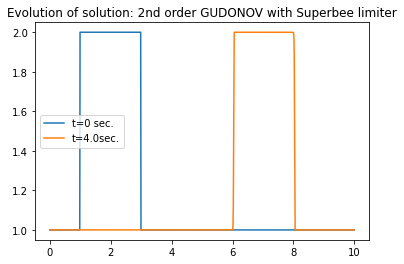

In [640]:
plt.plot(x, u0[1:-1], label = 't=0 sec.')
plt.plot(x, u[1:-1], label = 't='+str(t)+'sec.')
plt.title('Evolution of solution: 2nd order GUDONOV with Superbee limiter')
plt.legend()
plt.show()

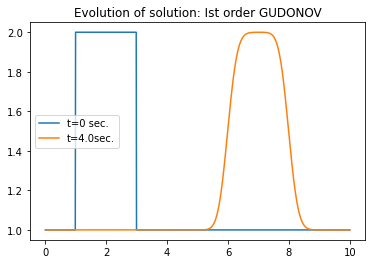

In [644]:
plt.plot(x, u0[1:-1], label = 't=0 sec.')
plt.plot(x, u[1:-1], label = 't='+str(t)+'sec.')
plt.title('Evolution of solution: Ist order GUDONOV')
plt.legend()
plt.show()